In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
df=pd.read_csv('data/train_1_only_bookings.csv')

In [3]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-02-27 18:01:32,2,3,66,318,52078,NaN,756,0,1,...,0,1,8291,1,1,1,2,50,191,2
3,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,0,1,...,0,1,1385,1,1,1,0,185,185,58
4,2014-11-23 18:02:20,30,4,195,991,47725,NaN,1048,0,0,...,0,1,8803,1,1,1,3,151,69,36


In [4]:
df.duplicated().sum()

0

In [5]:
df = df.iloc[1:].reset_index(drop=True)

In [6]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
1,2014-02-27 18:01:32,2,3,66,318,52078,NaN,756,0,1,...,0,1,8291,1,1,1,2,50,191,2
2,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,0,1,...,0,1,1385,1,1,1,0,185,185,58
3,2014-11-23 18:02:20,30,4,195,991,47725,NaN,1048,0,0,...,0,1,8803,1,1,1,3,151,69,36
4,2014-01-03 16:30:17,2,3,66,462,41898,2454.8588,1482,0,1,...,0,2,12009,1,1,1,2,50,680,95


In [7]:
df.isna().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    338779
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                           0
srch_co                           0
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
dtype: int64

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")   
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score


In [9]:
features = ['user_location_country', 'user_location_region', 'hotel_market', 'srch_destination_type_id']
X_train = df[features]
X_test = df[features]
y_train = df['hotel_cluster']


In [10]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.0868


In [12]:
# 4. Precision, Recall, F1 (macro and weighted)
precision_macro = precision_score(y_train, y_pred, average='macro')
precision_weighted = precision_score(y_train, y_pred, average='weighted')
recall_macro = recall_score(y_train, y_pred, average='macro')
recall_weighted = recall_score(y_train, y_pred, average='weighted')
f1_macro = f1_score(y_train, y_pred, average='macro')
f1_weighted = f1_score(y_train, y_pred, average='weighted')

print(f"Precision (macro): {precision_macro:.4f}")
print(f"Precision (weighted): {precision_weighted:.4f}")
print(f"Recall (macro): {recall_macro:.4f}")
print(f"Recall (weighted): {recall_weighted:.4f}")
print(f"F1-score (macro): {f1_macro:.4f}")
print(f"F1-score (weighted): {f1_weighted:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(cm)

# 6. Full Classification Report
print("Classification Report:")
print(classification_report(y_train, y_pred))

Precision (macro): 0.0202
Precision (weighted): 0.0287
Recall (macro): 0.0561
Recall (weighted): 0.0868
F1-score (macro): 0.0246
F1-score (weighted): 0.0349
Confusion Matrix:
[[ 2054   268     0 ...     0     0     0]
 [    0 12686     0 ...     0     0     0]
 [  699     0  2482 ...     0  1056     0]
 ...
 [ 1443     0   321 ...     0  1610     0]
 [  761     0   148 ...     0  4605     0]
 [  590    27   621 ...     0   789     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.32      0.07      6492
           1       0.26      1.00      0.41     12704
           2       0.08      0.16      0.11     15127
           3       0.00      0.00      0.00      4131
           4       0.00      0.00      0.00     11950
           5       0.09      0.11      0.10     14328
           6       0.00      0.00      0.00     14748
           7       0.06      0.06      0.06     11655
           8       0.00      0.00      0.00      73

In [13]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Now you can extract the year
df['search_year'] = df['date_time'].dt.year

In [14]:
df['search_month'] = df['date_time'].dt.month
df['search_dayofweek'] = df['date_time'].dt.dayofweek
df['search_hour'] = df['date_time'].dt.hour

In [15]:
df['srch_ci']   = pd.to_datetime(df['srch_ci'], errors='coerce')
df['lead_time'] = (df['srch_ci'] - df['date_time']).dt.days

df['srch_co'] = pd.to_datetime(df['srch_co'], errors='coerce')
df['stay_nights'] = (df['srch_co'] - df['srch_ci']).dt.days

In [16]:

# Set pandas to display floats in normal notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Quick descriptive statistics
print(df[['lead_time','stay_nights']].describe())

# Negative/absurd values
print('negative lead_time:', (df['lead_time'] < 0).sum())
print('long stays >365:', (df['stay_nights'] > 365).sum())

       lead_time  stay_nights
count 1000000.00   1000000.00
mean       34.91         2.43
std        51.87         2.02
min        -5.00        -9.00
25%         3.00         1.00
50%        15.00         2.00
75%        44.00         3.00
max       495.00        33.00
negative lead_time: 66321
long stays >365: 0


In [17]:
df = df[(df['lead_time'] >= 0) & (df['stay_nights'] >= 0)]


In [18]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,search_year,search_month,search_dayofweek,search_hour,lead_time,stay_nights
0,2014-08-11 08:22:12,2,3,66,348,48862,2234.26,12,0,1,...,2,50,628,1,2014,8,0,8,17,4
1,2014-02-27 18:01:32,2,3,66,318,52078,NaN,756,0,1,...,2,50,191,2,2014,2,3,18,49,2
2,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,0,1,...,0,185,185,58,2013,6,5,15,82,8
3,2014-11-23 18:02:20,30,4,195,991,47725,NaN,1048,0,0,...,3,151,69,36,2014,11,6,18,214,2
4,2014-01-03 16:30:17,2,3,66,462,41898,2454.86,1482,0,1,...,2,50,680,95,2014,1,4,16,49,5


In [19]:
df=df.drop(columns=['date_time'])

In [20]:
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,search_year,search_month,search_dayofweek,search_hour,lead_time,stay_nights
0,2,3,66,348,48862,2234.26,12,0,1,9,...,2,50,628,1,2014,8,0,8,17,4
1,2,3,66,318,52078,NaN,756,0,1,4,...,2,50,191,2,2014,2,3,18,49,2
2,30,4,195,548,56440,NaN,1048,0,1,9,...,0,185,185,58,2013,6,5,15,82,8
3,30,4,195,991,47725,NaN,1048,0,0,9,...,3,151,69,36,2014,11,6,18,214,2
4,2,3,66,462,41898,2454.86,1482,0,1,1,...,2,50,680,95,2014,1,4,16,49,5


In [21]:
df=df.drop(columns=['is_booking','cnt'])

In [22]:

# Convert srch_ci and srch_co to datetime (if not already)
df['srch_ci'] = pd.to_datetime(df['srch_ci'], errors='coerce')
df['srch_co'] = pd.to_datetime(df['srch_co'], errors='coerce')

# Extract year, month, day from check-in
df['ci_year'] = df['srch_ci'].dt.year
df['ci_month'] = df['srch_ci'].dt.month
df['ci_day'] = df['srch_ci'].dt.day
df['ci_weekday'] = df['srch_ci'].dt.weekday  # 0=Monday, 6=Sunday

# Extract year, month, day from check-out (optional)
df['co_year'] = df['srch_co'].dt.year
df['co_month'] = df['srch_co'].dt.month
df['co_day'] = df['srch_co'].dt.day
df['co_weekday'] = df['srch_co'].dt.weekday

# Stay length in days
df['stay_length'] = (df['srch_co'] - df['srch_ci']).dt.days

# Drop original date columns (if not needed)
df = df.drop(['srch_ci', 'srch_co'], axis=1)


In [23]:
df=df.drop(columns=['stay_length'], axis=1)

In [23]:
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,lead_time,stay_nights,ci_year,ci_month,ci_day,ci_weekday,co_year,co_month,co_day,co_weekday
0,2,3,66,348,48862,2234.26,12,0,1,9,...,17,4,2014,8,29,4,2014,9,2,1
1,2,3,66,318,52078,NaN,756,0,1,4,...,49,2,2014,4,18,4,2014,4,20,6
2,30,4,195,548,56440,NaN,1048,0,1,9,...,82,8,2013,9,6,4,2013,9,14,5
3,30,4,195,991,47725,NaN,1048,0,0,9,...,214,2,2015,6,26,4,2015,6,28,6
4,2,3,66,462,41898,2454.86,1482,0,1,1,...,49,5,2014,2,22,5,2014,2,27,3


In [24]:
X= df.drop(['hotel_cluster','orig_destination_distance'], axis=1)
y= df['hotel_cluster']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model1=DecisionTreeClassifier(max_depth=5)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTreeClassifier Accuracy: {accuracy:.4f}")

DecisionTreeClassifier Accuracy: 0.0959


# Simple Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression


In [29]:
model2 = LogisticRegression(multi_class='multinomial', max_iter=100, solver='lbfgs')
model2.fit(X_train, y_train)
probs = model2.predict_proba(X_test)
top5 = np.argsort(probs, axis=1)[:, -5:]

In [30]:
y_pred = model2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"LogisticRegression Top-1 Accuracy: {acc:.4f}")

LogisticRegression Top-1 Accuracy: 0.0396


In [31]:
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,lead_time,stay_nights,ci_year,ci_month,ci_day,ci_weekday,co_year,co_month,co_day,co_weekday
0,2,3,66,348,48862,2234.26,12,0,1,9,...,17,4,2014,8,29,4,2014,9,2,1
1,2,3,66,318,52078,NaN,756,0,1,4,...,49,2,2014,4,18,4,2014,4,20,6
2,30,4,195,548,56440,NaN,1048,0,1,9,...,82,8,2013,9,6,4,2013,9,14,5
3,30,4,195,991,47725,NaN,1048,0,0,9,...,214,2,2015,6,26,4,2015,6,28,6
4,2,3,66,462,41898,2454.86,1482,0,1,1,...,49,5,2014,2,22,5,2014,2,27,3


In [31]:
df['orig_destination_distance'].isna().sum()

322733

In [32]:
df['orig_destination_distance'] = df['orig_destination_distance'].fillna(df['orig_destination_distance'].median())

In [33]:
df.isna().sum()

site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
search_year                  0
search_month                 0
search_dayofweek             0
search_hour                  0
lead_time                    0
stay_nights                  0
ci_year                      0
ci_month                     0
ci_day                       0
ci_weekday                   0
co_year                      0
co_month                     0
co_day                       0
co_weekd

# Model 2 : Decision tree after imputation

In [34]:
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,lead_time,stay_nights,ci_year,ci_month,ci_day,ci_weekday,co_year,co_month,co_day,co_weekday
0,2,3,66,348,48862,2234.26,12,0,1,9,...,17,4,2014,8,29,4,2014,9,2,1
1,2,3,66,318,52078,907.09,756,0,1,4,...,49,2,2014,4,18,4,2014,4,20,6
2,30,4,195,548,56440,907.09,1048,0,1,9,...,82,8,2013,9,6,4,2013,9,14,5
3,30,4,195,991,47725,907.09,1048,0,0,9,...,214,2,2015,6,26,4,2015,6,28,6
4,2,3,66,462,41898,2454.86,1482,0,1,1,...,49,5,2014,2,22,5,2014,2,27,3


In [35]:
X= df.drop(['hotel_cluster'], axis=1)
y= df['hotel_cluster']

In [36]:
model2=DecisionTreeClassifier(max_depth=5)
model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred_model2)
print(f"DecisionTreeClassifier Accuracy: {accuracy:.4f}")

DecisionTreeClassifier Accuracy: 0.0959


# Decision tree classifier with more depth

In [38]:
model3 = DecisionTreeClassifier(max_depth=20, min_samples_split=50, random_state=42)
model3.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=20, min_samples_split=50, random_state=42)

In [39]:
y_pred_model3 = model3.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred_model3)
print(f"DecisionTreeClassifier Accuracy: {accuracy:.4f}")

DecisionTreeClassifier Accuracy: 0.1764


# Decision tree classifier after log transformation

In [41]:
df['orig_destination_distance_log'] = np.log1p(df['orig_destination_distance'])

In [42]:
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,stay_nights,ci_year,ci_month,ci_day,ci_weekday,co_year,co_month,co_day,co_weekday,orig_destination_distance_log
0,2,3,66,348,48862,2234.26,12,0,1,9,...,4,2014,8,29,4,2014,9,2,1,7.71
1,2,3,66,318,52078,907.09,756,0,1,4,...,2,2014,4,18,4,2014,4,20,6,6.81
2,30,4,195,548,56440,907.09,1048,0,1,9,...,8,2013,9,6,4,2013,9,14,5,6.81
3,30,4,195,991,47725,907.09,1048,0,0,9,...,2,2015,6,26,4,2015,6,28,6,6.81
4,2,3,66,462,41898,2454.86,1482,0,1,1,...,5,2014,2,22,5,2014,2,27,3,7.81


In [43]:
df['posa_continent'].value_counts()

posa_continent
3    721067
1    113666
2     67098
4     25792
0      6055
Name: count, dtype: int64

In [44]:
X= df.drop(['orig_destination_distance','hotel_cluster','user_id'], axis=1)
y= df['hotel_cluster']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model4 = DecisionTreeClassifier(max_depth=20, min_samples_split=50, random_state=42)
model4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=50, random_state=42)

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 933678 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   site_name                      933678 non-null  int64  
 1   posa_continent                 933678 non-null  int64  
 2   user_location_country          933678 non-null  int64  
 3   user_location_region           933678 non-null  int64  
 4   user_location_city             933678 non-null  int64  
 5   is_mobile                      933678 non-null  int64  
 6   is_package                     933678 non-null  int64  
 7   channel                        933678 non-null  int64  
 8   srch_adults_cnt                933678 non-null  int64  
 9   srch_children_cnt              933678 non-null  int64  
 10  srch_rm_cnt                    933678 non-null  int64  
 11  srch_destination_id            933678 non-null  int64  
 12  srch_destination_type_id       9336

In [47]:
y_pred_model4 = model4.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred_model4)
print(f"DecisionTreeClassifier Accuracy: {accuracy:.4f}")

DecisionTreeClassifier Accuracy: 0.1768


# Example: aggregate search-related ratios

In [50]:
X['people_count'] = X['srch_adults_cnt'] + X['srch_children_cnt']
X['adults_per_room'] = X['srch_adults_cnt'] / (X['srch_rm_cnt'] + 1)
X['children_per_room'] = X['srch_children_cnt'] / (X['srch_rm_cnt'] + 1)

In [51]:
X['weekend_stay'] = ((X['ci_weekday'] >= 5) | (X['co_weekday'] >= 5)).astype(int)



In [52]:
X['long_stay'] = (X['stay_nights'] > 7).astype(int)


In [53]:
X['search_season'] = X['search_month'] % 12 // 3  # 0=winter,1=spring,2=summer,3=fall
X['checkin_season'] = X['ci_month'] % 12 // 3

In [54]:
X['lead_time_log'] = np.log1p(X['lead_time'])
X['stay_nights_log'] = np.log1p(X['stay_nights'])

In [55]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [56]:
model5 = DecisionTreeClassifier(
    max_depth=50,            # deeper tree to capture non-linearities
    min_samples_split=200,   # prevent overfitting
    min_samples_leaf=100,    # smooth leaf nodes
    random_state=42,
    class_weight="balanced"  # handle class imbalance
)

In [57]:
model5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=50,
                       min_samples_leaf=100, min_samples_split=200,
                       random_state=42)

In [58]:
y_pred_model5 = model5.predict(X_val)

# Normal accuracy (will still be low because 100 classes)
acc = accuracy_score(y_val, y_pred_model5)
print(f"DecisionTree Accuracy: {acc:.4f}")

DecisionTree Accuracy: 0.1296


In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, top_k_accuracy_score

# ==================================
# 1. FILTER DATA
# ==================================
df_clean = df[df['stay_nights'] <= 30].copy()  # remove unrealistic long stays

y = df_clean['hotel_cluster']
X = df_clean.drop(['hotel_cluster'], axis=1)
if 'orig_destination_distance' in X.columns:
    X = X.drop(['orig_destination_distance'], axis=1)

# Remove user_id if it exists
if 'user_id' in X.columns:
    X = X.drop(['user_id'], axis=1)

# ==================================
# 2. FEATURE ENGINEERING
# ==================================
X['people_count'] = X['srch_adults_cnt'] + X['srch_children_cnt']
X['adults_per_room'] = X['srch_adults_cnt'] / (X['srch_rm_cnt'] + 1)
X['children_per_room'] = X['srch_children_cnt'] / (X['srch_rm_cnt'] + 1)

# seasonality
X['search_season'] = X['search_month'] % 12 // 3
X['checkin_season'] = X['ci_month'] % 12 // 3

# log transforms
X['lead_time_log'] = np.log1p(X['lead_time'])
X['stay_nights_log'] = np.log1p(X['stay_nights'])

# ==================================
# 3. TRAIN/VALIDATION SPLIT
# ==================================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==================================
# 4. DECISION TREE MODEL
# ==================================
model = DecisionTreeClassifier(
    max_depth=60,            # deeper tree to capture patterns
    min_samples_split=200,   # avoid overfitting small branches
    min_samples_leaf=100,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)

# ==================================
# 5. EVALUATION
# ==================================
y_pred = model.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print(f"DecisionTree Top-1 Accuracy: {acc:.4f}")

# More meaningful: Top-5 accuracy
y_proba = model.predict_proba(X_val)
top5_acc = top_k_accuracy_score(y_val, y_proba, k=5)
print(f"DecisionTree Top-5 Accuracy: {top5_acc:.4f}")


DecisionTree Top-1 Accuracy: 0.1299
DecisionTree Top-5 Accuracy: 0.4467


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.16      0.39      0.23      1252
           1       0.35      0.16      0.22      2442
           2       0.17      0.15      0.16      2924
           3       0.05      0.11      0.07       778
           4       0.15      0.17      0.16      2197
           5       0.12      0.05      0.07      2741
           6       0.15      0.10      0.12      2651
           7       0.13      0.16      0.14      2047
           8       0.20      0.36      0.26      1415
           9       0.14      0.11      0.12      2930
          10       0.09      0.05      0.07      1967
          11       0.09      0.11      0.10      1790
          12       0.11      0.30      0.17      1038
          13       0.16      0.11      0.13      2613
          14       0.04      0.07      0.05       910
          15       0.16      0.13      0.14      2402
          16       0.13      0.03      0.05      3365
          17       0.08    

In [66]:
import numpy as np
from collections import defaultdict

# Probabilities from decision tree
y_proba = model.predict_proba(X_val)

# Get top-5 predictions per sample
top5_preds = np.argsort(y_proba, axis=1)[:, -5:]   # last 5 after sorting ascending

# Initialize counters
per_class_hits = defaultdict(int)
per_class_total = defaultdict(int)

# Loop over validation samples
for true, preds in zip(y_val, top5_preds):
    per_class_total[true] += 1
    if true in preds:
        per_class_hits[true] += 1

# Compute per-class top-5 recall
per_class_top5_recall = {
    cls: per_class_hits[cls] / per_class_total[cls]
    for cls in per_class_total
}

# Show some results
for cls, score in list(per_class_top5_recall.items())[:10]:  # first 10 classes
    print(f"Cluster {cls}: Top-5 Recall = {score:.3f}")


Cluster 58: Top-5 Recall = 0.315
Cluster 56: Top-5 Recall = 0.857
Cluster 4: Top-5 Recall = 0.543
Cluster 28: Top-5 Recall = 0.361
Cluster 19: Top-5 Recall = 0.539
Cluster 48: Top-5 Recall = 0.198
Cluster 12: Top-5 Recall = 0.630
Cluster 30: Top-5 Recall = 0.197
Cluster 91: Top-5 Recall = 0.257
Cluster 90: Top-5 Recall = 0.265


In [67]:
X['people_count'].head()

0    2
1    2
2    2
3    2
4    3
Name: people_count, dtype: int64

In [86]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, top_k_accuracy_score


dest = pd.read_csv("data/raw_data/destinations.csv")

dest_id_col = "srch_destination_id"
dest_feat_cols = [c for c in dest.columns if c != dest_id_col]

# (Optional) sanity checks
assert len(dest_feat_cols) == 149, f"Expected 149 dest features, got {len(dest_feat_cols)}"
dest[dest_feat_cols] = dest[dest_feat_cols].apply(pd.to_numeric, errors="coerce").fillna(0)

PC_K = 4
pca_pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("pca", PCA(n_components=PC_K, random_state=42)),
])

dest_pcs = pca_pipe.fit_transform(dest[dest_feat_cols])

n_pcs = dest_pcs.shape[1]
var = pca_pipe.named_steps["pca"].explained_variance_ratio_.sum()
print(f"[PCA] Destination features reduced: 149 -> {n_pcs} PCs (explained var ≈ {var:.3f})")

pc_cols = [f"dest_pca_{i+1}" for i in range(n_pcs)]
dest_pca_df = pd.DataFrame(dest_pcs, columns=pc_cols)

# Keep dtype consistent with your bookings dataframe before merging
dest_pca_df.insert(0, dest_id_col, dest[dest_id_col].astype("int64"))



[PCA] Destination features reduced: 149 -> 4 PCs (explained var ≈ 0.622)


In [87]:

# ensure the ID dtypes match in both dataframes
df_clean[dest_id_col] = df_clean[dest_id_col].astype(dest_pca_df[dest_id_col].dtype)

df_clean["dest_missing"] = ~df_clean[dest_id_col].isin(dest_pca_df[dest_id_col])
df_merged = df_clean.merge(dest_pca_df, on=dest_id_col, how="left")

for c in pc_cols:
    df_merged[c] = df_merged[c].fillna(0.0)  # PCs are mean-centered, 0 is safe


In [90]:
df_clean.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,ci_year,ci_month,ci_day,ci_weekday,co_year,co_month,co_day,co_weekday,orig_destination_distance_log,dest_missing
0,2,3,66,348,48862,2234.26,12,0,1,9,...,2014,8,29,4,2014,9,2,1,7.71,False
1,2,3,66,318,52078,907.09,756,0,1,4,...,2014,4,18,4,2014,4,20,6,6.81,False
2,30,4,195,548,56440,907.09,1048,0,1,9,...,2013,9,6,4,2013,9,14,5,6.81,False
3,30,4,195,991,47725,907.09,1048,0,0,9,...,2015,6,26,4,2015,6,28,6,6.81,False
4,2,3,66,462,41898,2454.86,1482,0,1,1,...,2014,2,22,5,2014,2,27,3,7.81,False


In [92]:


# =========================================
# 3) FEATURE ENGINEERING (lightweight, tree-friendly)
# =========================================
X = df_merged.drop(columns=['hotel_cluster']).copy()
y = df_merged['hotel_cluster'].copy()

# Keep only the log distance you already prepared
# (No action needed if you already removed the raw distance above)

# Drop 'user_id' if it sneaked back in (safety)

# =========================================
# 4) TRAIN / VALIDATION SPLIT
# =========================================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.18, random_state=42, stratify=y
)

# =========================================
# 5) DECISION TREE (tuned for Top-5, not too deep, pruned a bit)
# =========================================
best_dt = DecisionTreeClassifier(
    max_depth=80,            # large but bounded
    min_samples_split=200,   # control overfitting
    min_samples_leaf=120,    # smoother leaves
    class_weight="balanced", # mitigate class imbalance
    max_features=0.8,        # consider 80% of features per split (helps generalization)
    random_state=42
)

best_dt.fit(X_train, y_train)

# =========================================
# 6) EVALUATION (Top-1 + Top-5)
# =========================================
y_pred = best_dt.predict(X_val)
y_proba = best_dt.predict_proba(X_val)

top1 = accuracy_score(y_val, y_pred)
top5 = top_k_accuracy_score(y_val, y_proba, k=5)
print(f"DecisionTree  Top-1 Acc: {top1:.4f}")
print(f"DecisionTree  Top-5 Acc: {top5:.4f}")

# =========================================
# 7) TOP-5 RECALL REPORT (overall + per class)
# =========================================
def topk_recall_report(y_true, y_prob, classes, k=5):
    y_true = np.asarray(y_true)
    y_prob = np.asarray(y_prob)
    classes = np.asarray(classes)

    # Efficient top-k without full sort
    topk_idx = np.argpartition(y_prob, -k, axis=1)[:, -k:]
    topk_labels = classes[topk_idx]
    hits = (topk_labels == y_true[:, None]).any(axis=1)

    # Per-class support & hits
    support = pd.Series(y_true).value_counts().sort_index()
    hits_per_class = pd.Series(y_true[hits]).value_counts().reindex(support.index, fill_value=0)
    recall_per_class = (hits_per_class / support).fillna(0)

    report_df = pd.DataFrame({
        "class": support.index,
        "support": support.values,
        "hits_at_k": hits_per_class.values,
        f"recall_at_{k}": recall_per_class.values
    }).sort_values(by=f"recall_at_{k}", ascending=False).reset_index(drop=True)

    micro = hits.mean()
    macro = recall_per_class.mean()
    weighted = (recall_per_class * (support / support.sum())).sum()

    summary = {
        f"top_{k}_accuracy_micro": float(micro),
        f"recall_at_{k}_macro": float(macro),
        f"recall_at_{k}_weighted": float(weighted),
        "n_classes_in_val": int(len(support)),
        "n_samples": int(len(y_true)),
    }
    return report_df, summary

rep_df, rep_sum = topk_recall_report(y_val, y_proba, dt.classes_, k=5)
print(rep_sum)

cols = ["class", "support", "hits_at_k", "recall_at_5"]

# Top 5 classes by recall@5 (tie-break by larger support, then class id)
top5 = rep_df.sort_values(["recall_at_5", "support", "class"],
                          ascending=[False, False, True]).head(5)
print("\nTop 5 clusters by recall@5:")
print(top5[cols].to_string(index=False, float_format=lambda x: f"{x:.3f}"))

# Bottom 5 classes by recall@5 (optionally ignore tiny classes)
min_support = 50  # tweak as you like to avoid noisy small classes
bottom_pool = rep_df[rep_df["support"] >= min_support] if "support" in rep_df else rep_df
bottom5 = bottom_pool.sort_values(["recall_at_5", "support", "class"],
                                  ascending=[True, False, True]).head(5)
print(f"\nBottom 5 clusters by recall@5 (support ≥ {min_support}):")
print(bottom5[cols].to_string(index=False, float_format=lambda x: f"{x:.3f}"))



DecisionTree  Top-1 Acc: 0.1318
DecisionTree  Top-5 Acc: 0.4502
{'top_5_accuracy_micro': 0.45016720019992623, 'recall_at_5_macro': 0.5087213528166737, 'recall_at_5_weighted': 0.45016720019992623, 'n_classes_in_val': 100, 'n_samples': 168062}

Top 5 clusters by recall@5:
 class  support  hits_at_k  recall_at_5
    74      137        137        1.000
    66      570        560        0.982
     1     2198       2153        0.980
    65     1268       1223        0.965
    27      149        143        0.960

Bottom 5 clusters by recall@5 (support ≥ 50):
 class  support  hits_at_k  recall_at_5
    40     1542        283        0.184
    30     1600        353        0.221
     5     2467        545        0.221
    51     1587        355        0.224
    50     2834        662        0.234


# 1) Summary & Top-k accuracy curve

    k  top_k_accuracy
0   1            0.13
1   3            0.32
2   5            0.45
3  10            0.65


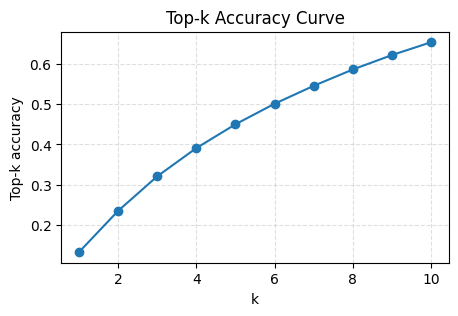

Top-1: 0.13183825016958028
Top-5: 0.45016720019992623


In [93]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, top_k_accuracy_score
import matplotlib.pyplot as plt

# Probabilities from your fitted model
y_proba = best_dt.predict_proba(X_val)
y_pred  = best_dt.predict(X_val)

# ---- summary at common k's
def topk_summary(y_true, y_prob, ks=(1,3,5,10)):
    out = []
    for k in ks:
        out.append({"k": k, "top_k_accuracy": top_k_accuracy_score(y_true, y_prob, k=k)})
    return pd.DataFrame(out)

summary_df = topk_summary(y_val, y_proba)
print(summary_df)

# ---- Top-k curve
ks = list(range(1, 11))
vals = [top_k_accuracy_score(y_val, y_proba, k=k) for k in ks]
plt.figure(figsize=(5,3))
plt.plot(ks, vals, marker='o')
plt.xlabel("k")
plt.ylabel("Top-k accuracy")
plt.title("Top-k Accuracy Curve")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

print("Top-1:", accuracy_score(y_val, y_pred))
print("Top-5:", top_k_accuracy_score(y_val, y_proba, k=5))


In [94]:
def topk_per_class_metrics(y_true, y_prob, classes, k=5, eps=1e-12):
    y_true  = np.asarray(y_true)
    y_prob  = np.asarray(y_prob)
    classes = np.asarray(classes)

    topk_idx = np.argpartition(y_prob, -k, axis=1)[:, -k:]
    topk_lbl = classes[topk_idx]
    row_hits = (topk_lbl == y_true[:, None]).any(axis=1)

    support = pd.Series(y_true).value_counts().sort_index()
    hits_per_class = pd.Series(y_true[row_hits]).value_counts().reindex(support.index, fill_value=0)
    pred_counts = pd.Series(topk_lbl.ravel()).value_counts().reindex(support.index, fill_value=0)

    recall_at_k    = (hits_per_class / (support + eps)).fillna(0.0)
    precision_at_k = (hits_per_class / (pred_counts + eps)).fillna(0.0)
    f1_at_k        = (2 * recall_at_k * precision_at_k / (recall_at_k + precision_at_k + eps)).fillna(0.0)

    return pd.DataFrame({
        "class": support.index,
        "support": support.values,
        "pred_in_topk": pred_counts.values,
        "hits_at_k": hits_per_class.values,
        f"recall_at_{k}": recall_at_k.values,
        f"precision_at_{k}": precision_at_k.values,
        f"f1_at_{k}": f1_at_k.values,
    })

metrics_df = topk_per_class_metrics(y_val, y_proba, best_dt.classes_, k=5)

cols = ["class","support","pred_in_topk","hits_at_k","recall_at_5","precision_at_5","f1_at_5"]
print("\nTop 5 classes by recall@5:")
print(metrics_df.sort_values("recall_at_5", ascending=False)[cols].head(5).to_string(index=False))

print("\nBottom 5 classes by recall@5:")
print(metrics_df.sort_values("recall_at_5", ascending=True)[cols].head(5).to_string(index=False))

print("\nTop 5 classes by precision@5:")
print(metrics_df.sort_values("precision_at_5", ascending=False)[cols].head(5).to_string(index=False))

print("\nBottom 5 classes by precision@5:")
print(metrics_df.sort_values("precision_at_5", ascending=True)[cols].head(5).to_string(index=False))



Top 5 classes by recall@5:
 class  support  pred_in_topk  hits_at_k  recall_at_5  precision_at_5  f1_at_5
    74      137           510        137         1.00            0.27     0.42
    66      570          3663        560         0.98            0.15     0.26
     1     2198          7352       2153         0.98            0.29     0.45
    65     1268          4075       1223         0.96            0.30     0.46
    27      149          1619        143         0.96            0.09     0.16

Bottom 5 classes by recall@5:
 class  support  pred_in_topk  hits_at_k  recall_at_5  precision_at_5  f1_at_5
    40     1542          7031        283         0.18            0.04     0.07
    30     1600          5389        353         0.22            0.07     0.10
     5     2467          6083        545         0.22            0.09     0.13
    51     1587          7040        355         0.22            0.05     0.08
    50     2834          7264        662         0.23            0.09   

# Some categories are very well covered.

For classes like 74, 66, 1, 65, recall is extremely high (close to 100%). This means customers almost always see the right option in the top 5.

Precision is also comparatively better here, meaning the top 5 list is reasonably relevant.

Other categories perform poorly.

For classes like 40, 30, 5, 51, 50, recall is very low (below 25%). Customers in these categories often won’t find the correct option in the top 5, leading to frustration or missed opportunities.

Precision for some classes is especially poor (e.g., classes 93, 60, 53, 35, 86 with 2–3%). This means many irrelevant suggestions appear, reducing trust in recommendations.

Business impact:

High-recall categories → strong customer experience, high likelihood of satisfaction, and efficiency gains.

Low-recall/low-precision categories → risk of customer churn, wasted interactions, and potential revenue loss.

Imbalanced performance suggests that certain product lines, services, or customer segments are underserved.

Next steps:

Investigate why weaker categories underperform (data imbalance, fewer examples, or harder to classify).

Consider targeted improvements (data augmentation, category-specific tuning).

Communicate to stakeholders that while the model works very well for some high-value areas, there are specific weak spots that need addressing before scaling broadly.